### 1) Cargar dataset limpiado

In [ ]:
import pandas as pd

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL cruda del archivo CSV en GitHub
url = 'https://github.com/jcastilloc168/PythonUDD_ProyectoFinal/raw/main/data/BaseDefinitivaINDICES-2005-2024_cleaned.csv'

# Leer el archivo CSV desde GitHub
df_clean = pd.read_csv(url, delimiter=';')

## Mostrar las primeras cinco filas
print(df_clean.head())

# 2) Creacion de nuevas variables 

### 2.1) Nueva columna con la macro zonas del pais

Con la finalidad de hacer un estudio con el comportamiento de las macrozonas del pais en la relacion a la matricula en educación superior, crearemos una variable denomina "Macrozona". Para el caso de la región metropolitana se dejará como "Metropolitana".

In [ ]:
# Definir un diccionario para mapear las regiones a sus macrozonas correspondientes
macrozona_map = {
    "Region de Arica y Parinacota": "Macrozona Norte",
    "Region de Tarapaca": "Macrozona Norte",
    "Region de Antofagasta": "Macrozona Norte",
    "Region de Atacama": "Macrozona Norte",
    "Region de Coquimbo": "Macrozona Centro",
    "Region de Valparaiso": "Macrozona Centro",
    "Region del Gral. B. O`Higgins": "Macrozona Centro Sur",
    "Region del Maule": "Macrozona Centro Sur",
    "Region de Nuble": "Macrozona Centro Sur",
    "Region del Bio-Bio": "Macrozona Centro Sur",
    "Region de La Araucania": "Macrozona Sur",
    "Region de Los Lagos": "Macrozona Sur",
    "Region de los Rios": "Macrozona Sur",
    "Region de Aysen": "Macrozona Austral",
    "Region de Magallanes": "Macrozona Austral"
}

# Crear la nueva columna de macrozonas
df_clean['Macrozona'] = df_clean['Nombre_Region'].map(macrozona_map)

# Para las regiones que no estén en el diccionario (como Región Metropolitana), dejamos la región igual
df_clean['Macrozona'].fillna(df_clean['Nombre_Region'], inplace=True)

print(df_clean.head())

### 2.2) Creación de nuevas variables de porcentaje de estudiantes y costo total carrera

In [ ]:
# Crear nuevas variables relacionadas con la matrícula

# Porcentaje de Matriculados Primer Año Extranjeros
df_clean['Porcentaje_Matricula_Primer_Anio_Extranjeros'] = (df_clean['Matricula_Primer_Anio_Extranjeros'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Total Extranjeros
df_clean['Porcentaje_Matricula_Total_Extranjeros'] = (df_clean['Matricula_Total_Extranjeros'] / df_clean['Matricula_Total']) * 100

# Porcentaje de Matriculados Primer Año Hombres
df_clean['Porcentaje_Matricula_Primer_Anio_Hombres'] = (df_clean['Matricula_Primer_Anio_Hombres'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Primer Año Mujeres
df_clean['Porcentaje_Matricula_Primer_Anio_Mujeres'] = (df_clean['Matricula_Primer_Anio_Mujeres'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Total Hombres
df_clean['Porcentaje_Matricula_Total_Hombres'] = (df_clean['Matricula_Total_Hombres'] / df_clean['Matricula_Total']) * 100

# Porcentaje de Matriculados Total Mujeres
df_clean['Porcentaje_Matricula_Total_Mujeres'] = (df_clean['Matricula_Total_Mujeres'] / df_clean['Matricula_Total']) * 100

# Costo Total de Educación
df_clean['Costo_Total_Programa'] = df_clean['Valor_Matricula'] + df_clean['Valor_Arancel']

# Mostrar las primeras filas para verificar las nuevas columnas
print(df_clean.head())

# 3) Visualizaciones del dataset

### 3.1) Evolución de la matricula nueva por año y por genero

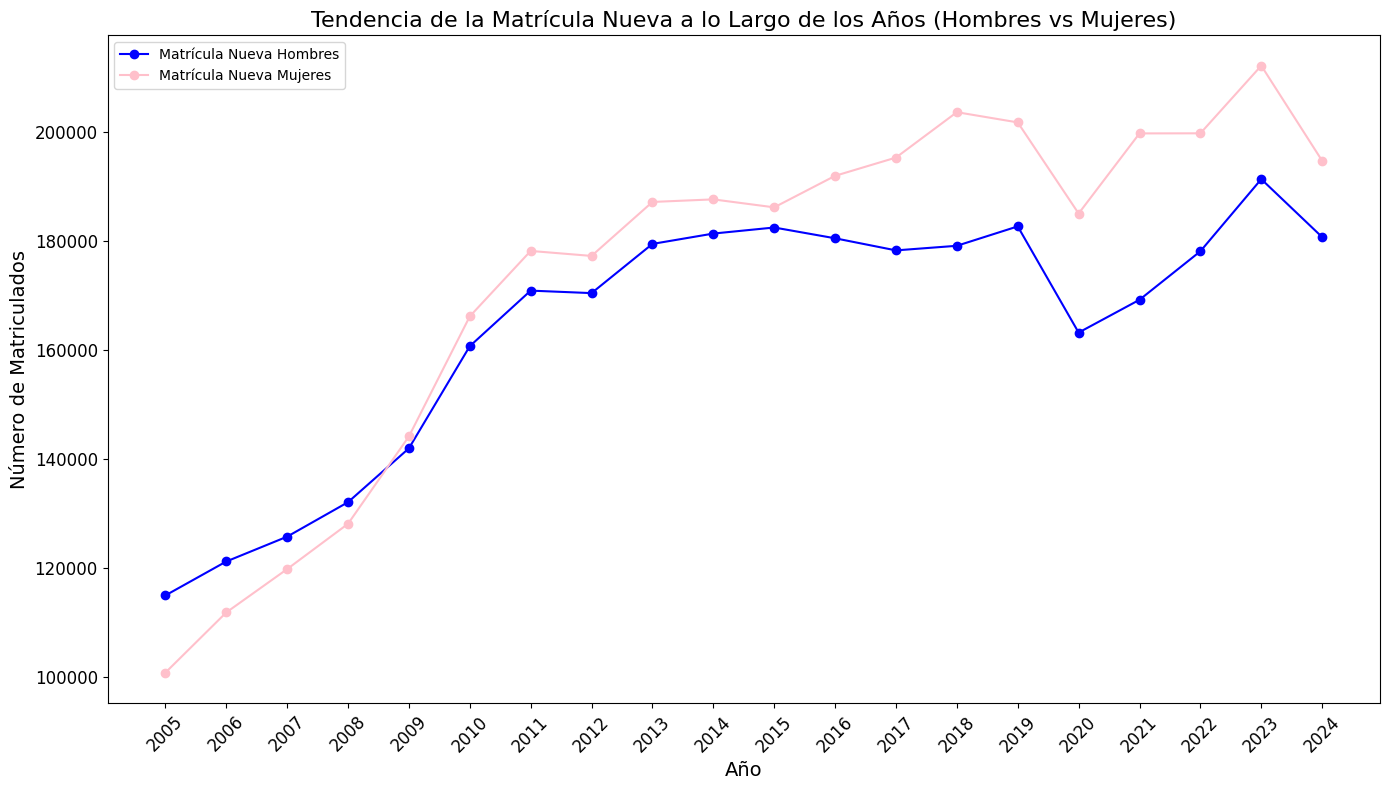

In [5]:
import matplotlib.pyplot as plt

# Tendencia de la matrícula nueva a lo largo de los años diferenciando entre hombres y mujeres
plt.figure(figsize=(14, 8))
matricula_nueva_hombres_por_anio = df_clean.groupby('Anio')['Matricula_Primer_Anio_Hombres'].sum()
matricula_nueva_mujeres_por_anio = df_clean.groupby('Anio')['Matricula_Primer_Anio_Mujeres'].sum()

# Graficar ambas series
ax = matricula_nueva_hombres_por_anio.plot(kind='line', color='blue', marker='o', label='Matrícula Nueva Hombres')
ax = matricula_nueva_mujeres_por_anio.plot(kind='line', color='pink', marker='o', label='Matrícula Nueva Mujeres')

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Nueva a lo Largo de los Años (Hombres vs Mujeres)', fontsize=16)
plt.ylabel('Número de Matriculados', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(ticks=matricula_nueva_hombres_por_anio.index, labels=matricula_nueva_hombres_por_anio.index.astype(int), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### 3.2) Evolución de la matricula total por año y por genero

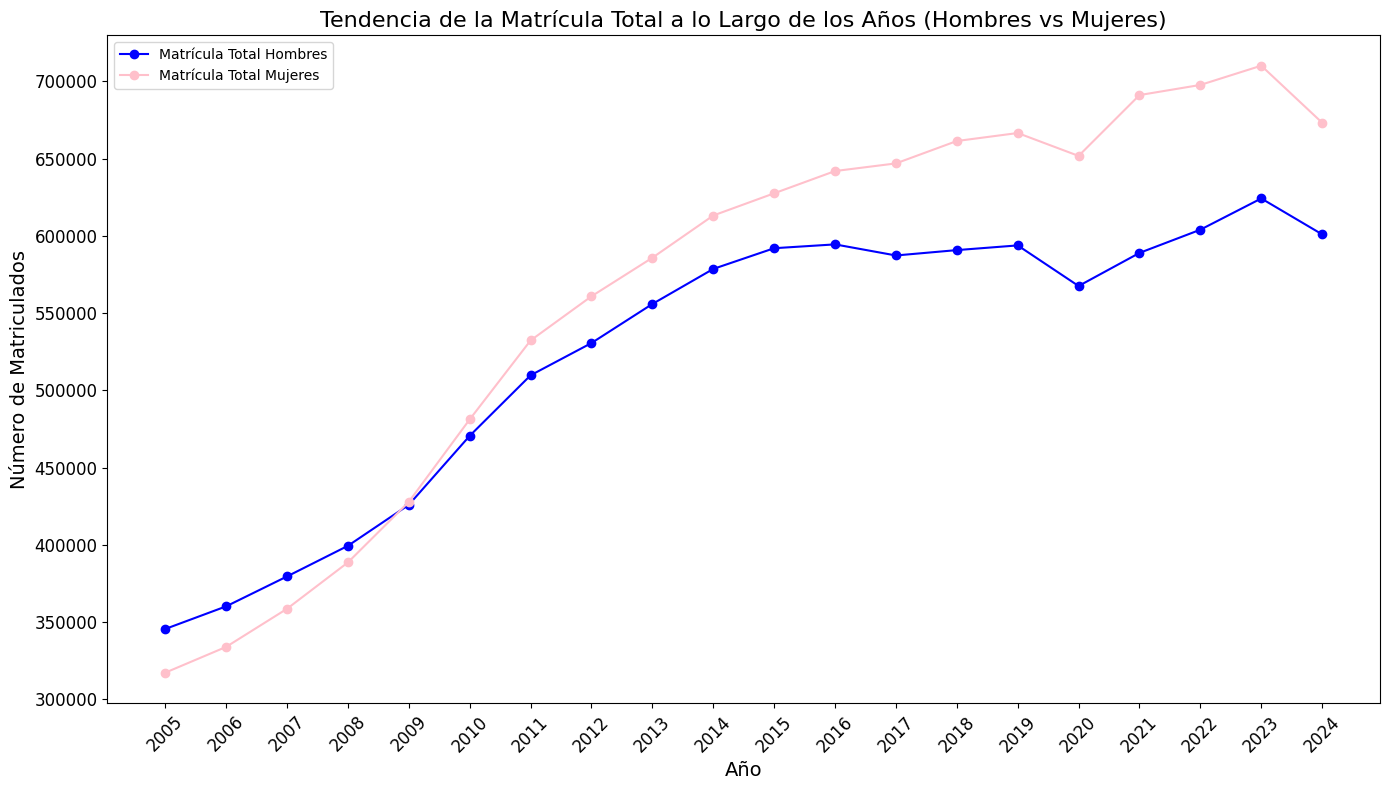

In [6]:
# Tendencia de la matrícula total a lo largo de los años diferenciando entre hombres y mujeres
plt.figure(figsize=(14, 8))
matricula_total_hombres_por_anio = df_clean.groupby('Anio')['Matricula_Total_Hombres'].sum()
matricula_total_mujeres_por_anio = df_clean.groupby('Anio')['Matricula_Total_Mujeres'].sum()

# Graficar ambas series
ax = matricula_total_hombres_por_anio.plot(kind='line', color='blue', marker='o', label='Matrícula Total Hombres')
ax = matricula_total_mujeres_por_anio.plot(kind='line', color='pink', marker='o', label='Matrícula Total Mujeres')

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Total a lo Largo de los Años (Hombres vs Mujeres)', fontsize=16)
plt.ylabel('Número de Matriculados', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(ticks=matricula_total_hombres_por_anio.index, labels=matricula_total_hombres_por_anio.index.astype(int), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### 3.3) Porcentaje de genero de la matrícula total por Región

<Figure size 1400x800 with 0 Axes>

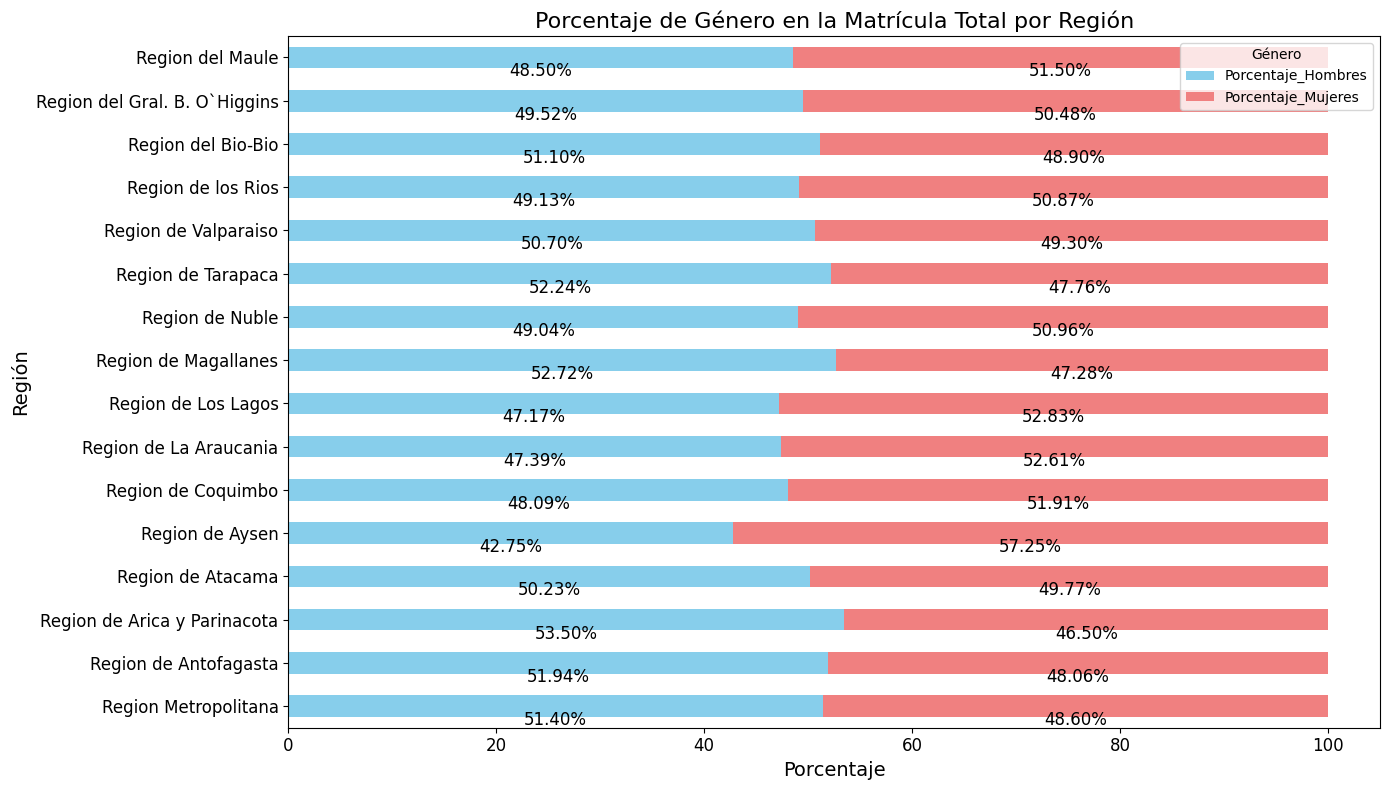

In [7]:
# Agrupar los datos por región
df_gender_pct = df_clean.groupby('Nombre_Region')[['Porcentaje_Matricula_Total_Hombres', 'Porcentaje_Matricula_Total_Mujeres']].mean()

# Mejorar el gráfico de relación de género en la matrícula total por región
plt.figure(figsize=(14, 8))
ax = df_gender_pct.plot(kind='barh', stacked=True, figsize=(14, 8), color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Género en la Matrícula Total por Región', fontsize=16)
plt.xlabel('Porcentaje', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for i in range(len(df_gender_pct)):
    pct_hombres = df_gender_pct.iloc[i, 0]
    pct_mujeres = df_gender_pct.iloc[i, 1]
    ax.annotate(f'{pct_hombres:.2f}%', 
                (pct_hombres / 2, i), 
                ha='center', va='center', 
                xytext=(0, -10), 
                textcoords='offset points', fontsize=12, color='black')
    ax.annotate(f'{pct_mujeres:.2f}%', 
                (pct_hombres + pct_mujeres / 2, i), 
                ha='center', va='center', 
                xytext=(0, -10), 
                textcoords='offset points', fontsize=12, color='black')

plt.legend(['Porcentaje_Hombres', 'Porcentaje_Mujeres'], title='Género')
plt.tight_layout()
plt.show()

### 3.4) Distribucion de la matricula total por Región

Este grafico muestra la cantidad total de matriculados por Región en los años 2005-2024. Se muestra que Región Metropolitana tiene la mayor cantidad de estudiantes de educación superior, seguido por la region de Valparaiso y Bio-Bio.

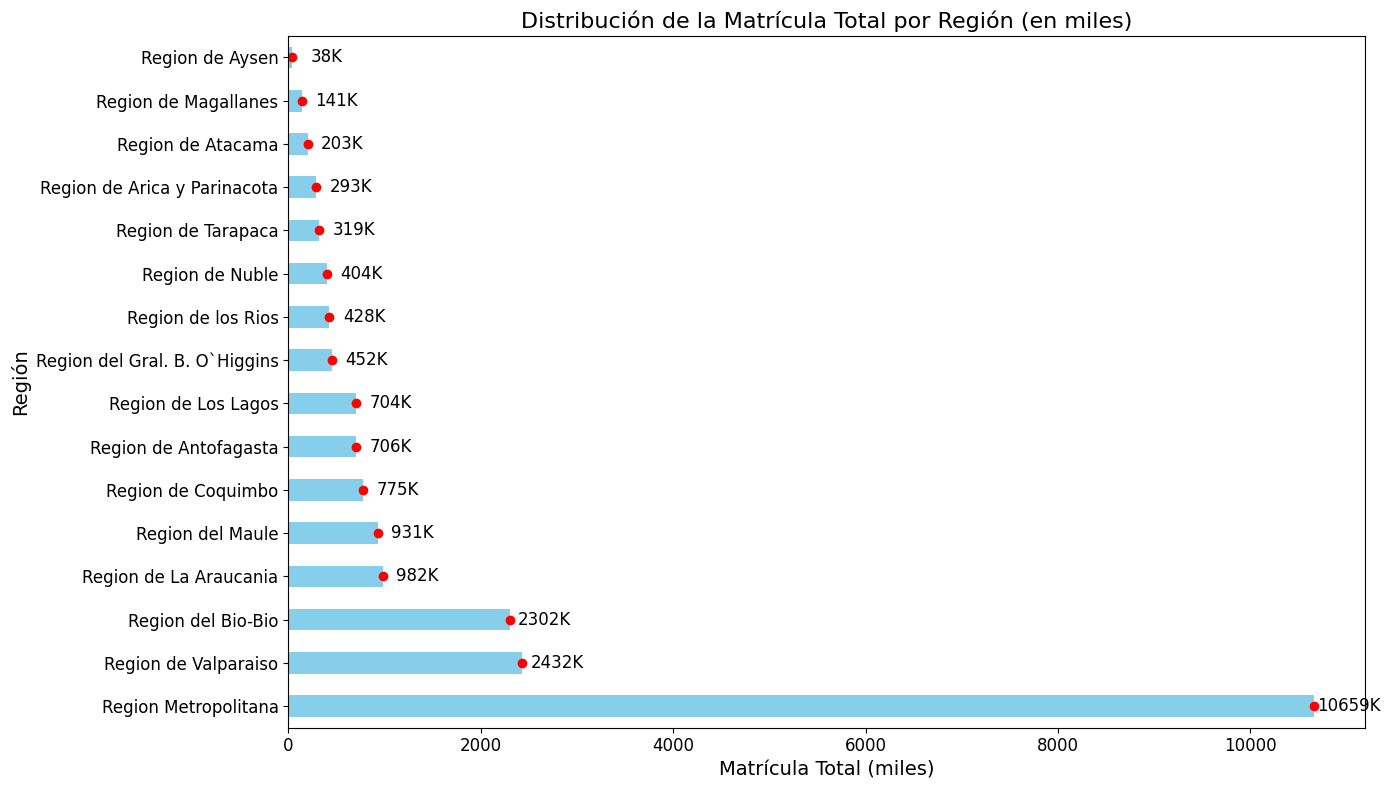

In [8]:
# 1. Distribución de la Matrícula Total por Región
import matplotlib.pyplot as plt

# Agrupar y ordenar los datos por matrícula total y convertir a miles
matricula_total_por_region = df_clean.groupby('Nombre_Region')['Matricula_Total'].sum().sort_values(ascending=False) / 1e3

# Mejorar el gráfico de distribución de la matrícula total por región
plt.figure(figsize=(14, 8))
ax = matricula_total_por_region.plot(kind='barh', color='skyblue')
plt.title('Distribución de la Matrícula Total por Región (en miles)', fontsize=16)
plt.xlabel('Matrícula Total (miles)', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                xytext=(25, 0), 
                textcoords='offset points', fontsize=12)

# Añadir puntos al final de las barras
for p in ax.patches:
    plt.plot(p.get_width(), p.get_y() + p.get_height() / 2, 'ro')

plt.tight_layout()
plt.show()

### 3.5) Distribucion de la matricula total por Macrozonas del País (Excluye la Region Metropolitana)

Con la finalidad se visualizar el aporte que tiene las Regiones a la cantidad de estudiantes en educación superior, se presenta el siguiente gráfico

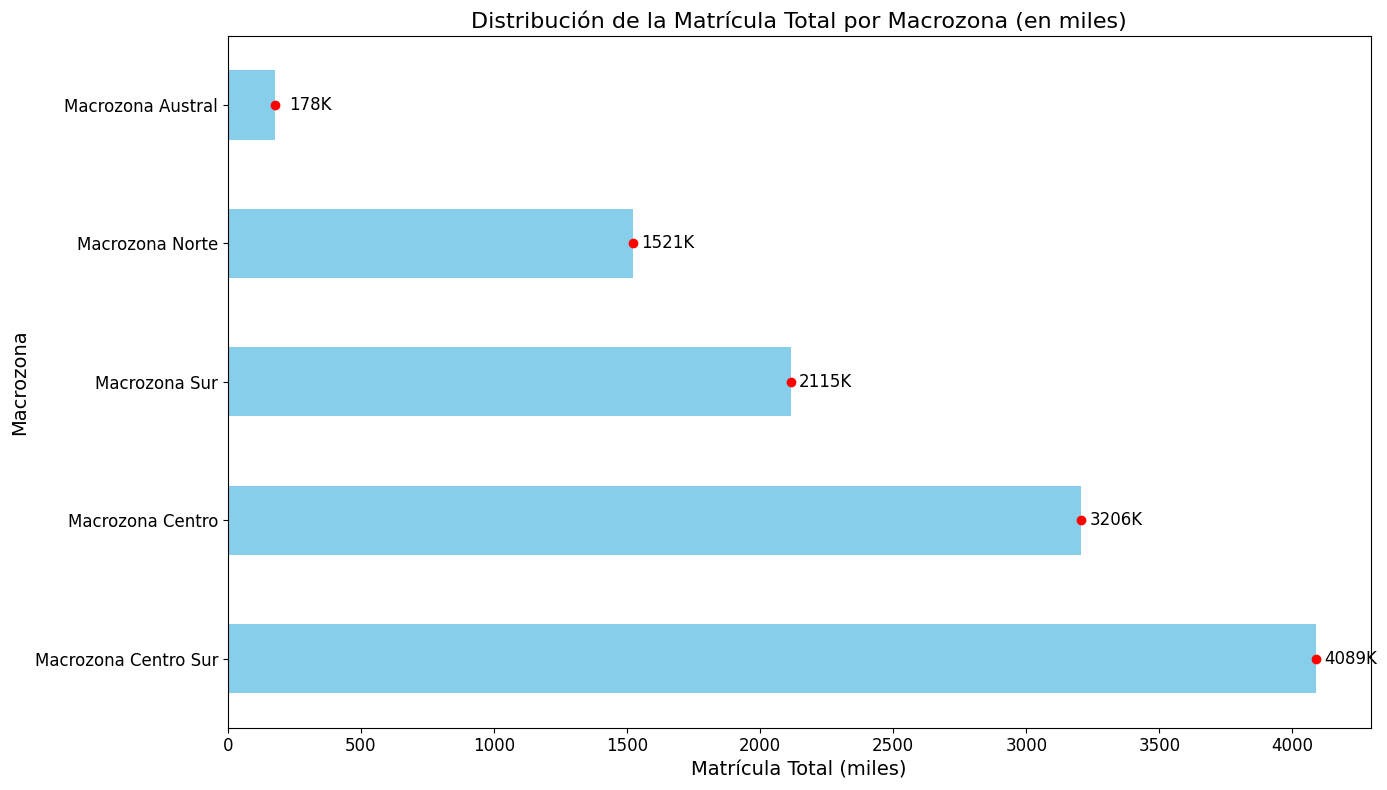

In [9]:
# Excluir la Región Metropolitana
df_filtered = df_clean[df_clean['Nombre_Region'] != 'Region Metropolitana']

# Agrupar y ordenar los datos por macrozona y convertir a miles
matricula_total_por_macrozona = df_filtered.groupby('Macrozona')['Matricula_Total'].sum().sort_values(ascending=False) / 1e3

# Mejorar el gráfico de distribución de la matrícula total por macrozona
plt.figure(figsize=(14, 8))
ax = matricula_total_por_macrozona.plot(kind='barh', color='skyblue')
plt.title('Distribución de la Matrícula Total por Macrozona (en miles)', fontsize=16)
plt.xlabel('Matrícula Total (miles)', fontsize=14)
plt.ylabel('Macrozona', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                xytext=(25, 0), 
                textcoords='offset points', fontsize=12)

# Añadir puntos al final de las barras
for p in ax.patches:
    plt.plot(p.get_width(), p.get_y() + p.get_height() / 2, 'ro')

plt.tight_layout()
plt.show()

### 3.6) Distribucion de la matricula total de estudiantes extranjeros por Región

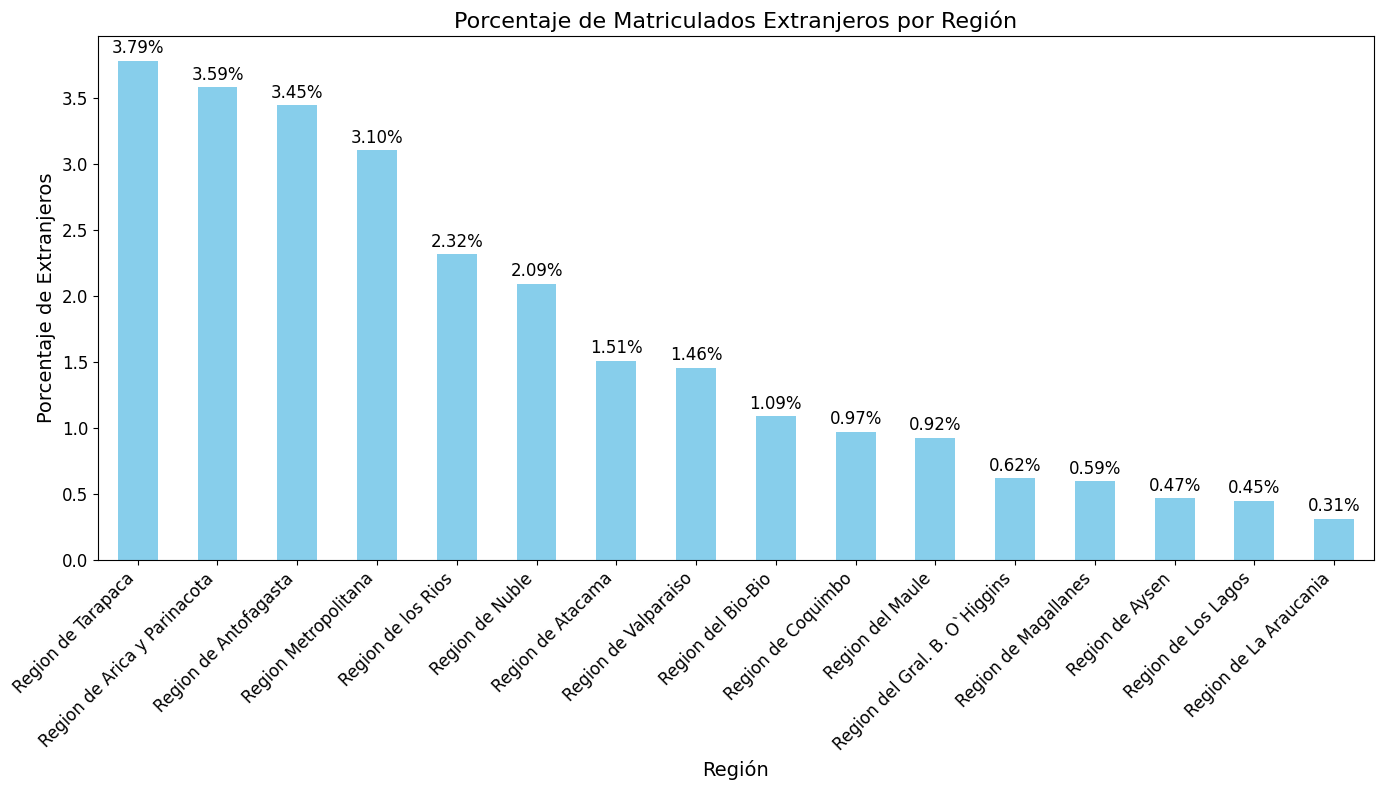

In [10]:
# Agrupar y ordenar los datos por porcentaje de matriculados extranjeros
porcentaje_extranjeros_por_region = df_clean.groupby('Nombre_Region')['Porcentaje_Matricula_Total_Extranjeros'].mean().sort_values(ascending=False)

# Mejorar el gráfico de porcentaje de matriculados extranjeros por región
plt.figure(figsize=(14, 8))
ax = porcentaje_extranjeros_por_region.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Matriculados Extranjeros por Región', fontsize=16)
plt.ylabel('Porcentaje de Extranjeros', fontsize=14)
plt.xlabel('Región', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()